In [76]:
import pandas as pd

df = pd.read_csv("PremierLeague.csv")
df.tail()


,Season,Date,Time,HomeTeam,AwayTeam,FullTimeHomeTeamGoals,FullTimeAwayTeamGoals,FullTimeResult,HalfTimeHomeTeamGoals,HalfTimeAwayTeamGoals,...,MarketMaxHomeTeam,MarketMaxDraw,MarketMaxAwayTeam,MarketAvgHomeTeam,MarketAvgDraw,MarketAvgAwayTeam,MarketMaxOver2.5Goals,MarketMaxUnder2.5Goals,MarketAvgOver2.5Goals,MarketAvgUnder2.5Goals
11673,2023-2024,10/03/24,13:00:00,Aston Villa,Tottenham,0,4,A,0.0,0.0,...,2.49,4.26,2.70,2.42,4.08,2.62,1.39,3.39,1.36,3.19
11674,2023-2024,10/03/24,14:00:00,Brighton,Nott'm Forest,1,0,H,1.0,0.0,...,1.84,4.21,4.50,1.78,4.04,4.25,1.68,2.38,1.62,2.32
11675,2023-2024,10/03/24,14:00:00,West Ham,Burnley,2,2,D,0.0,2.0,...,1.71,4.26,5.20,1.67,4.08,4.97,1.79,2.20,1.72,2.15
11676,2023-2024,10/03/24,15:45:00,Liverpool,Man City,1,1,D,0.0,1.0,...,3.15,4.00,2.34,2.95,3.83,2.25,1.54,2.75,1.50,2.59
11677,2023-2024,11/03/24,20:00:00,Chelsea,Newcastle,3,2,H,1.0,1.0,...,1.98,4.26,3.70,1.94,4.08,3.54,1.49,2.82,1.46,2.71


In [77]:
##Väljer att ta bort information jag inte behöver som är strängar för att enklare bearbeta datan
df_new = df.drop(["Season", "Date", "Time", "Referee", "HomeTeam", "AwayTeam"], axis=1)
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11678 entries, 0 to 11677
Data columns (total 33 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   FullTimeHomeTeamGoals   11678 non-null  int64  
 1   FullTimeAwayTeamGoals   11678 non-null  int64  
 2   FullTimeResult          11678 non-null  object 
 3   HalfTimeHomeTeamGoals   10918 non-null  float64
 4   HalfTimeAwayTeamGoals   10918 non-null  float64
 5   HalfTimeResult          10918 non-null  object 
 6   HomeTeamShots           9018 non-null   float64
 7   AwayTeamShots           9018 non-null   float64
 8   HomeTeamShotsOnTarget   9018 non-null   float64
 9   AwayTeamShotsOnTarget   9018 non-null   float64
 10  HomeTeamCorners         9018 non-null   float64
 11  AwayTeamCorners         9018 non-null   float64
 12  HomeTeamFouls           9018 non-null   float64
 13  AwayTeamFouls           9018 non-null   float64
 14  HomeTeamYellowCards     9018 non-null 

In [78]:
##Konverterar om värden så att mina modeller kan hantera dem
df_new['ConvertedFullTimeResult'] = df_new['FullTimeResult'].map({'H': 1, 'A': 2, 'D': 0})
df_new['ConvertedHalfTimeResult'] = df_new['HalfTimeResult'].map({'H': 1, 'A': 2, 'D': 0})
df_new = df_new.drop(['FullTimeResult', 'HalfTimeResult'], axis=1)
df = df_new

In [79]:
##Vill se mycket av datan som inte har några värden
nan_count = df.isna().sum()
nan_count

FullTimeHomeTeamGoals         0
FullTimeAwayTeamGoals         0
HalfTimeHomeTeamGoals       760
HalfTimeAwayTeamGoals       760
HomeTeamShots              2660
AwayTeamShots              2660
HomeTeamShotsOnTarget      2660
AwayTeamShotsOnTarget      2660
HomeTeamCorners            2660
AwayTeamCorners            2660
HomeTeamFouls              2660
AwayTeamFouls              2660
HomeTeamYellowCards        2660
AwayTeamYellowCards        2660
HomeTeamRedCards           2660
AwayTeamReadCards          2660
B365HomeTeam               3420
B365Draw                   3420
B365AwayTeam               3420
B365Over2.5Goals           8877
B365Under2.5Goals          8877
MarketMaxHomeTeam          9880
MarketMaxDraw              9880
MarketMaxAwayTeam          9880
MarketAvgHomeTeam          9880
MarketAvgDraw              9880
MarketAvgAwayTeam          9880
MarketMaxOver2.5Goals      9880
MarketMaxUnder2.5Goals     9880
MarketAvgOver2.5Goals      9880
MarketAvgUnder2.5Goals     9880
Converte

In [80]:
def nan_index(column):
    nan = df[column].isna()

    first_nan_index = nan.idxmax() if nan.any() else None
    last_nan_index = nan[::-1].idxmax() if nan.any() else None

    print(f'First NaN is on row: {first_nan_index}')
    print(f'Last NaN is on row: {last_nan_index}')
    

In [81]:
nan_index('MarketAvgUnder2.5Goals')

First NaN is on row: 0
Last NaN is on row: 9879


In [82]:
##Väljer att rensa data för att optmimera, tar bort det jag anser inte är intressant och som innehåller många NaN
drop_features = ['B365Over2.5Goals', 'B365Under2.5Goals', 'MarketMaxHomeTeam', 'MarketMaxDraw', 'MarketMaxAwayTeam', 'MarketAvgHomeTeam', 
                'MarketAvgDraw', 'MarketAvgAwayTeam', 'MarketMaxOver2.5Goals', 'MarketMaxUnder2.5Goals', 'MarketAvgOver2.5Goals', 
                'MarketAvgUnder2.5Goals']
df = df.drop(drop_features, axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11678 entries, 0 to 11677
Data columns (total 21 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   FullTimeHomeTeamGoals    11678 non-null  int64  
 1   FullTimeAwayTeamGoals    11678 non-null  int64  
 2   HalfTimeHomeTeamGoals    10918 non-null  float64
 3   HalfTimeAwayTeamGoals    10918 non-null  float64
 4   HomeTeamShots            9018 non-null   float64
 5   AwayTeamShots            9018 non-null   float64
 6   HomeTeamShotsOnTarget    9018 non-null   float64
 7   AwayTeamShotsOnTarget    9018 non-null   float64
 8   HomeTeamCorners          9018 non-null   float64
 9   AwayTeamCorners          9018 non-null   float64
 10  HomeTeamFouls            9018 non-null   float64
 11  AwayTeamFouls            9018 non-null   float64
 12  HomeTeamYellowCards      9018 non-null   float64
 13  AwayTeamYellowCards      9018 non-null   float64
 14  HomeTeamRedCards      

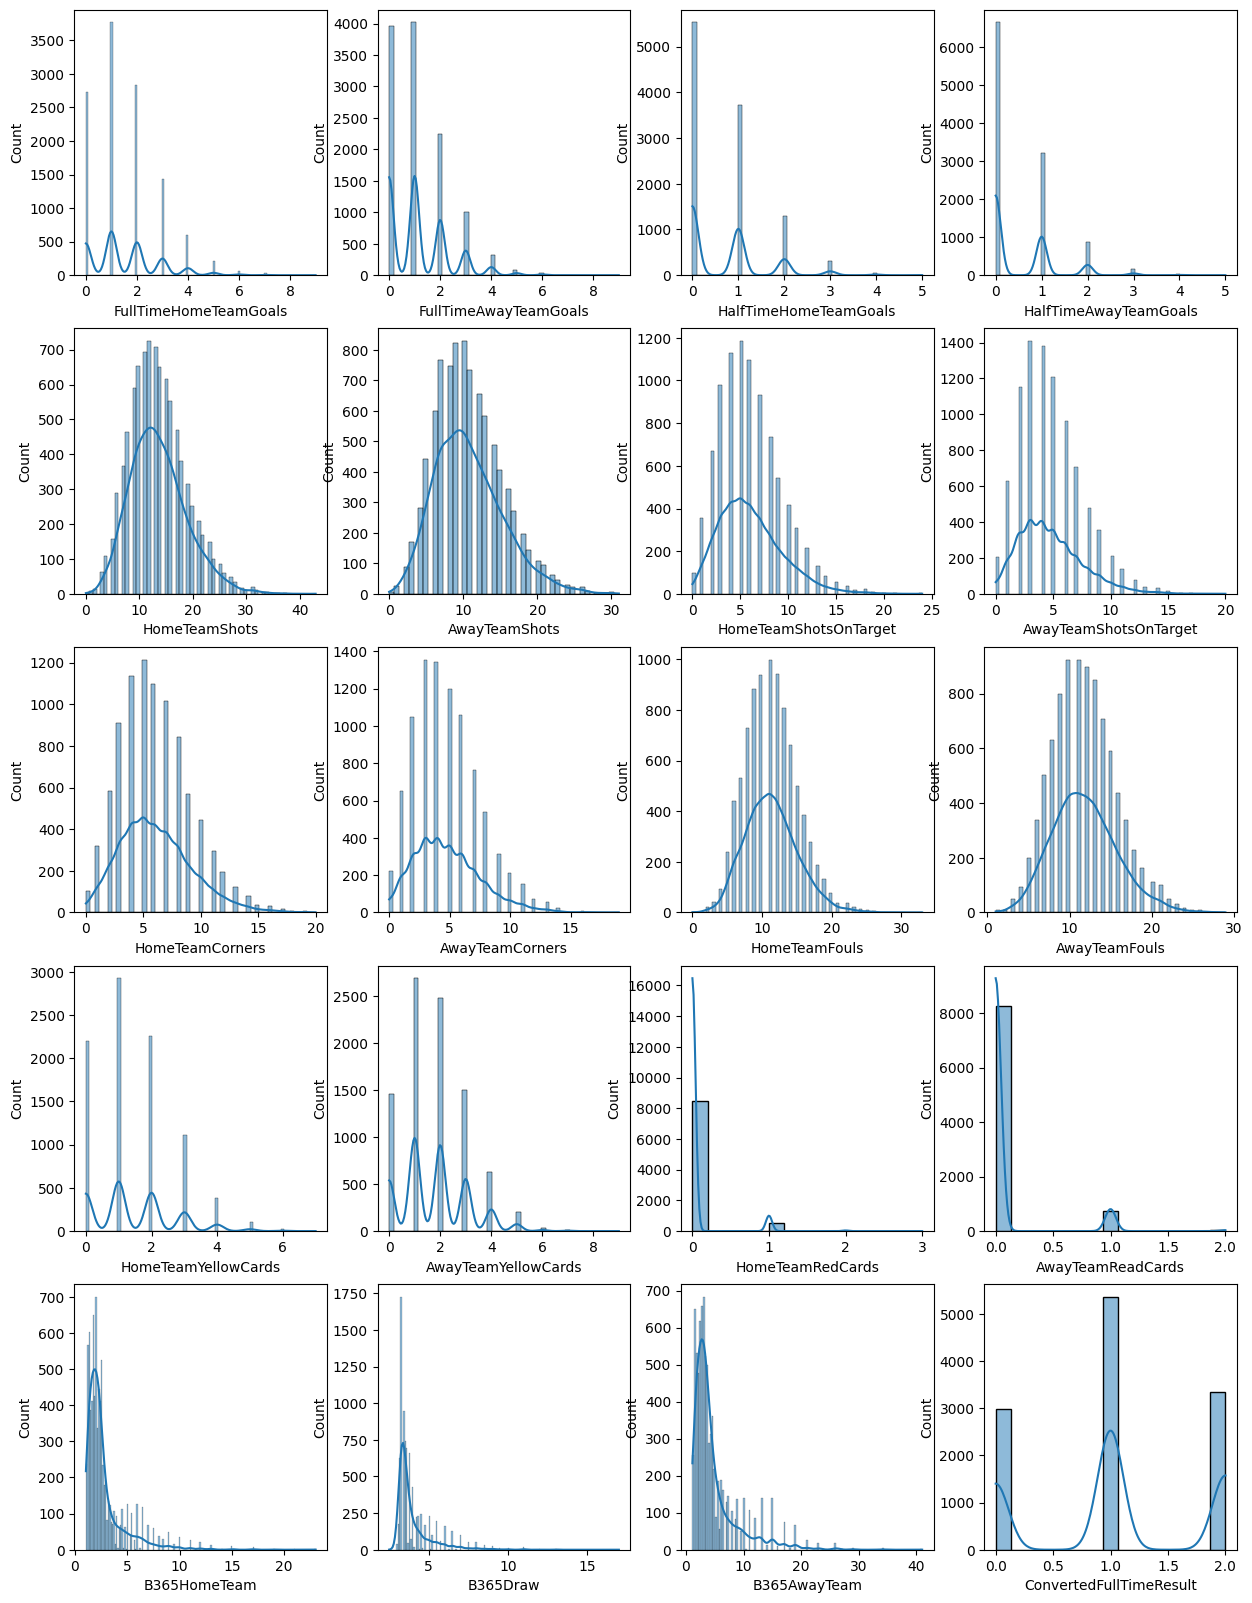

In [83]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(15, 20))

for i in range(1, min(len(df.columns), 20) + 1):
    plt.subplot(5, 4, i)
    sns.histplot(df[df.columns[i - 1]], kde=True)

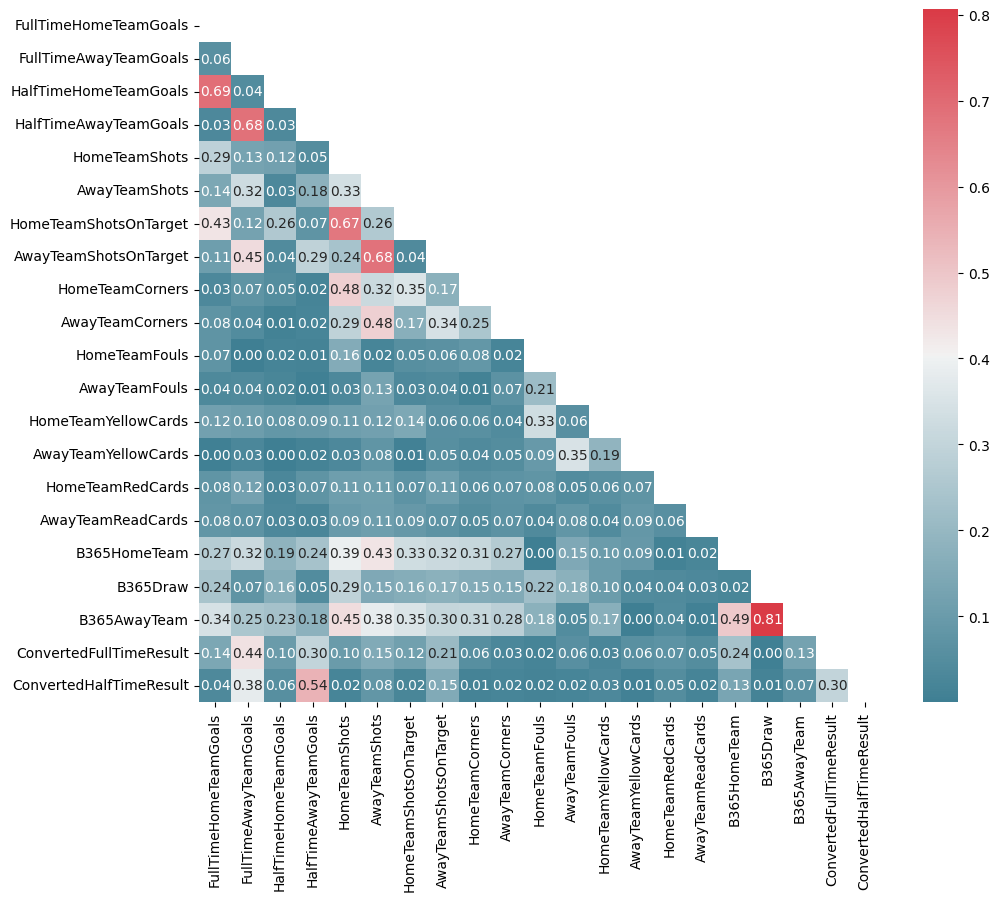

In [84]:
import numpy as np

def print_corr_heatmap(df):
    corr_df = df.corr()
    
    corr_df.ConvertedFullTimeResult.abs().sort_values(ascending=False).index[0:]
    
    plt.figure(figsize=(11, 9))
    drop_self = np.zeros_like(corr_df)
    drop_self[np.triu_indices_from(drop_self)] = True
    
    sns.heatmap(corr_df.abs(), cmap=sns.diverging_palette(220, 10, as_cmap=True), annot=True, fmt=".2f", mask=drop_self)
    
print_corr_heatmap(df)

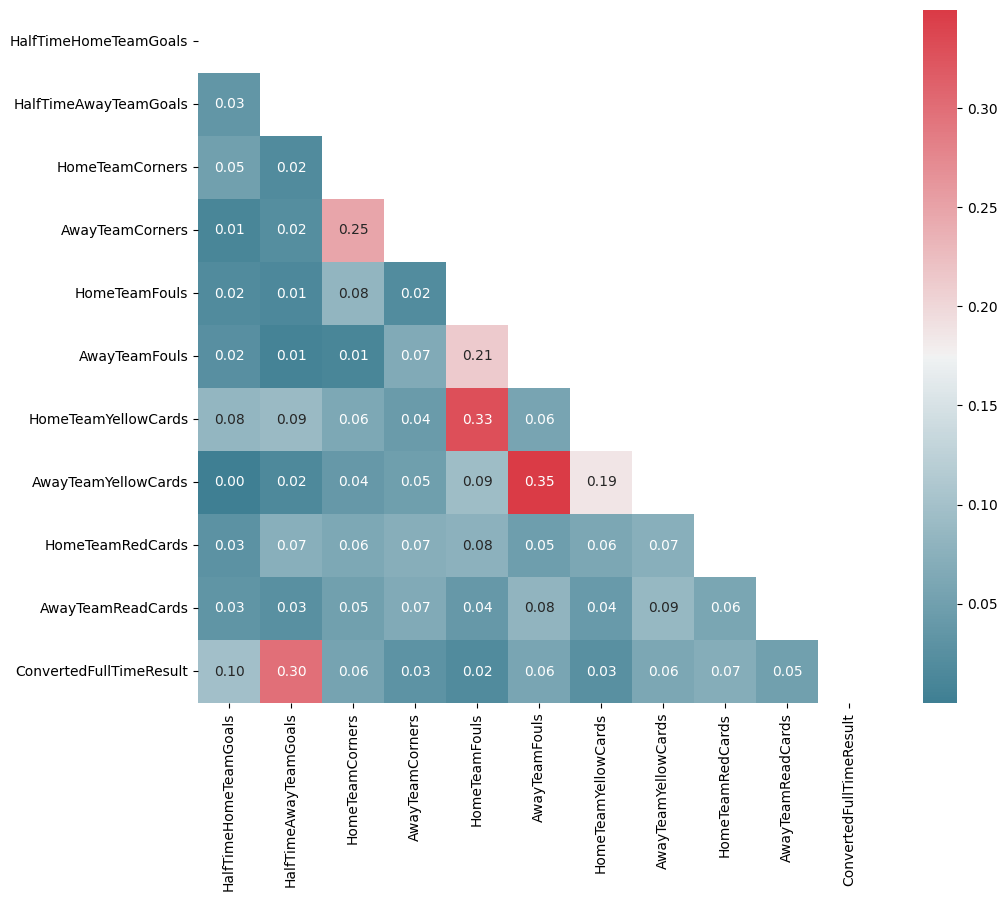

In [85]:
##Tar bort dessa rader för att inte få med betting statistik samt antal mål som gjorts i matchen. 
##Tar även bort det som inte är normalfördelat
##Väljer att ha kvar HomeTeamShots samt AwayTeamShots då dessa endast har hög korrelation till skott på mål och antal hörnor
drop_features = ['B365HomeTeam', 'B365Draw', 'B365AwayTeam', 'FullTimeHomeTeamGoals', 'FullTimeAwayTeamGoals', 
                 'ConvertedHalfTimeResult', 'HomeTeamShotsOnTarget', 'AwayTeamShotsOnTarget', 'HomeTeamShots',
                'AwayTeamShots']

df = df.drop(drop_features, axis=1)

print_corr_heatmap(df)

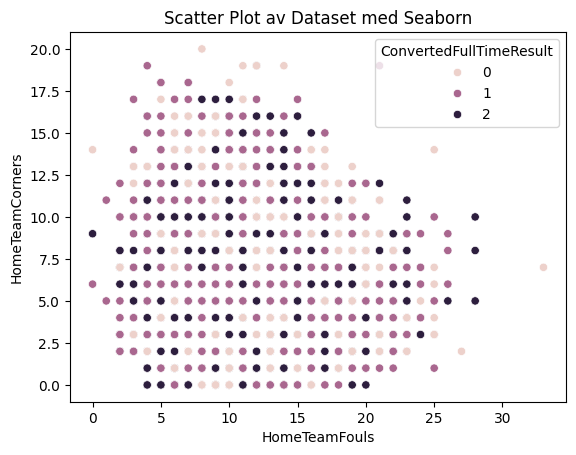

In [86]:
sns.scatterplot(x='HomeTeamFouls', y='HomeTeamCorners', hue='ConvertedFullTimeResult', data=df)
plt.title('Scatter Plot av Dataset med Seaborn')
plt.show()

In [87]:
y = df['ConvertedFullTimeResult']
x = df.drop(['ConvertedFullTimeResult'], axis=1)

x.shape

(11678, 10)

In [88]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=10)

print("Train data:", len(x_train))
print("Test data:", len(x_test))

Train data: 9342
Test data: 2336


In [89]:
##RANDOM FOREST med NaN värden
from sklearn.ensemble import RandomForestClassifier

##Dess hyperparametrar verkade ge optimalt resultat
rf_clr = RandomForestClassifier(max_depth=11, n_estimators=500, max_leaf_nodes=200, min_samples_split=3, random_state=1)
rf_clr.fit(x_train, y_train)

RandomForestClassifier(max_depth=11, max_leaf_nodes=200, min_samples_split=3,
                       n_estimators=500, random_state=1)

In [90]:
from sklearn.metrics import accuracy_score
y_pred = rf_clr.predict(x_test)

print("RF Accuracy:", accuracy_score(y_pred, y_test))

RF Accuracy: 0.5928938356164384


In [91]:
##Ersätter all NaN värden med medelvärden för att se hur det påverkar RANDOM FOREST
df_clean = df
df_clean.fillna(df.mean(), inplace=True)

In [92]:
y = df_clean['ConvertedFullTimeResult']
x = df_clean.drop(['ConvertedFullTimeResult'], axis=1)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=10)

In [93]:
rf_clr.fit(x_train, y_train)
y_pred = rf_clr.predict(x_test)

print("RF NaN avg Accuracy:", accuracy_score(y_pred, y_test))

RF NaN avg Accuracy: 0.601027397260274


In [94]:
##Gradient Boosting Classifier
from sklearn.ensemble import GradientBoostingClassifier

gb_clf = GradientBoostingClassifier(n_estimators=20, max_depth=3, max_features='sqrt', warm_start=True, random_state=3).fit(x_train, y_train)
gb_clf.score(x_test, y_test)

0.5967465753424658

In [ ]:
##Testar SupportVectorMachine
from sklearn.svm import SVC

svc_clr = SVC(kernel='poly', degree=3)

svc_clr.fit(x_train, y_train)

In [ ]:
y_pred = svc_clr.predict(x_test)

print("SVC Accuracy:", accuracy_score(y_pred, y_test))

In [ ]:
df.iloc[7081]

In [ ]:
x_pred = [0, 1, 7, 7, 19, 10, 3, 2, 0, 0]

pred = svc_clr.predict([x_pred])
print(pred)